In [1]:
#installing pandas datareader
#!pip install pandas-datareader

In [2]:
#!pip install yfinance

In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [4]:
import yfinance as yf

# Define the stock symbol and the date range
symbol = 'AAPL'
start_date = '2021-08-18'
end_date = '2023-07-17'

# Retrieve the stock data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-18,149.800003,150.720001,146.149994,146.360001,144.881470,86326000
2021-08-19,145.029999,148.000000,144.500000,146.699997,145.218033,86960300
2021-08-20,147.440002,148.500000,146.779999,148.190002,146.693008,60549600
2021-08-23,148.309998,150.190002,147.889999,149.710007,148.197662,60131800
2021-08-24,149.449997,150.860001,149.149994,149.619995,148.108551,48606400


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.610001,59922200
2023-07-11,189.160004,189.300003,186.600006,188.080002,188.080002,46638100
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.770004,60750200
2023-07-13,190.500000,191.190002,189.779999,190.539993,190.539993,41342300
2023-07-14,190.229996,191.179993,189.630005,190.690002,190.690002,41573900


<AxesSubplot:xlabel='Date'>

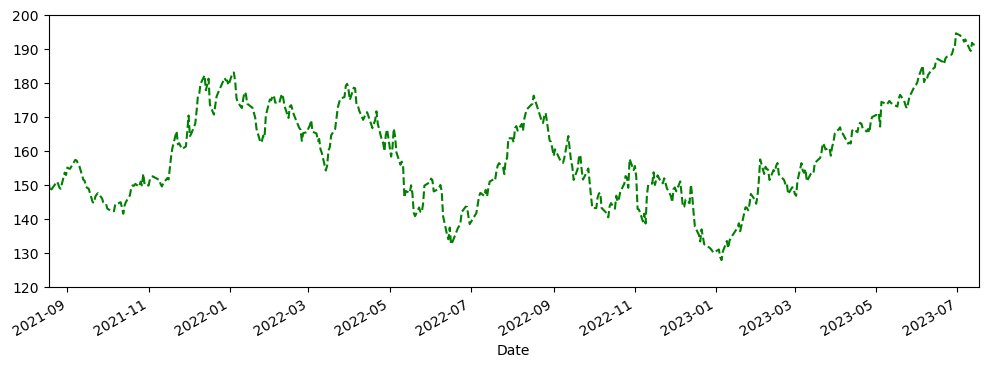

In [7]:
data['High'].plot(xlim=['2021-08-18','2023-07-17'],ylim=[120,200],figsize=(12,4),ls='--',c='green')

In [8]:
index = data.loc['2021-08-18':'2023-07-17'].index
stock_open = data.loc['2021-08-18':'2023-07-17']['Open']
stock_high = data.loc['2021-08-18':'2023-07-17']['High']
stock_low = data.loc['2021-08-18':'2023-07-17']['Low']
stock_close = data.loc['2021-08-18':'2023-07-17']['Close']

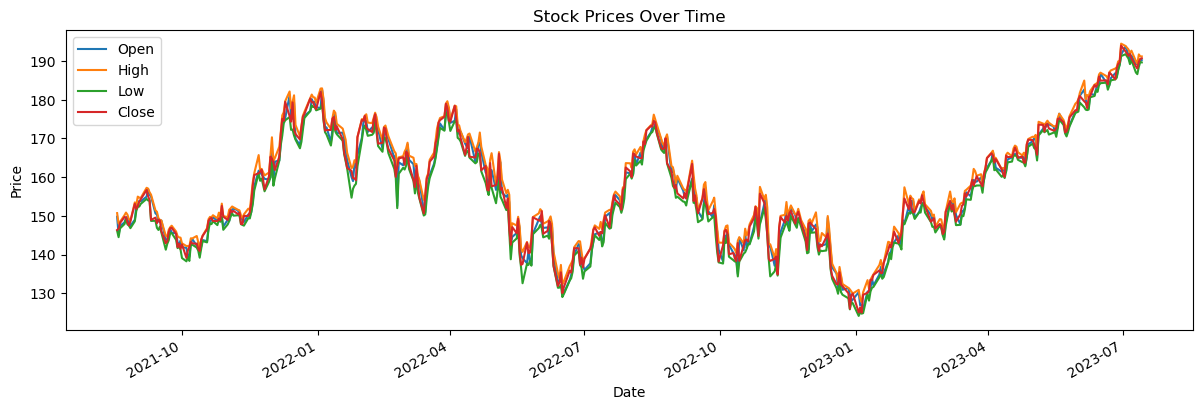

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

figure, axis = plt.subplots(figsize=(12,4))
plt.tight_layout()
# preventing overlapping
figure.autofmt_xdate()

# assuming 'index', 'stock_open', 'stock_high', 'stock_low', 'stock_close' are defined
axis.plot(index, stock_open, label='Open')
axis.plot(index, stock_high, label='High')
axis.plot(index, stock_low, label='Low')
axis.plot(index, stock_close, label='Close')

# Add labels and title
axis.set_xlabel('Date')
axis.set_ylabel('Price')
axis.set_title('Stock Prices Over Time')

# Add a legend
axis.legend()

plt.show()


In [10]:
df1 = stock_open

In [11]:
df1

Date
2021-08-18    149.800003
2021-08-19    145.029999
2021-08-20    147.440002
2021-08-23    148.309998
2021-08-24    149.449997
                 ...    
2023-07-10    189.259995
2023-07-11    189.160004
2023-07-12    189.679993
2023-07-13    190.500000
2023-07-14    190.229996
Name: Open, Length: 479, dtype: float64

In [12]:
# Calculate the split point
split_point = int(len(df1) * 0.8)

# Split the data
train_data = df1.iloc[:split_point]
test_data = df1.iloc[split_point:]

# Print the shapes of the training and testing sets
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)


Training set shape: (383,)
Testing set shape: (96,)


In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_data_scaled=scaler.fit_transform(np.array(train_data).reshape(-1,1))
test_data_scaled=scaler.fit_transform(np.array(test_data).reshape(-1,1))

In [14]:
train_data_scaled

array([[0.42016955],
       [0.33592363],
       [0.37848815],
       [0.39385366],
       [0.41398788],
       [0.42034607],
       [0.39456028],
       [0.3791945 ],
       [0.40604021],
       [0.47068174],
       [0.47368418],
       [0.49205213],
       [0.49010934],
       [0.51148   ],
       [0.54697973],
       [0.52066411],
       [0.51200983],
       [0.43482871],
       [0.42988348],
       [0.39826906],
       [0.39614976],
       [0.40286125],
       [0.31419993],
       [0.31649576],
       [0.32567986],
       [0.36453534],
       [0.34705052],
       [0.34369477],
       [0.30448599],
       [0.29070997],
       [0.31172732],
       [0.28064272],
       [0.27817011],
       [0.23807847],
       [0.23772516],
       [0.30113025],
       [0.31826202],
       [0.2871777 ],
       [0.30413269],
       [0.26898627],
       [0.28435178],
       [0.3136701 ],
       [0.30801826],
       [0.37089352],
       [0.40074168],
       [0.40268446],
       [0.41822676],
       [0.400

In [15]:
train_data_scaled.shape,test_data_scaled.shape

((383, 1), (96, 1))

In [16]:
def prepare_data(train_data, window_size):
    X, y = [], []
    for i in range(len(train_data) - window_size):
        X.append(train_data[i:i+window_size])
        y.append(train_data[i+window_size])
    X = np.array(X)
    y = np.array(y)
    return X, y


In [17]:
X_train, y_train = prepare_data(train_data_scaled, window_size=5)
X_test, y_test = prepare_data(test_data_scaled, window_size=5)

In [18]:
X_train.shape,y_train.shape

((378, 5, 1), (378, 1))

In [19]:
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout, BatchNormalization, Conv1D

# Assuming each data point has 5 time steps and 2 features (open and score)
n_steps = 5
n_features = 1
input_shape=(n_steps, n_features)

# Define the model
model = Sequential()

# One-dimensional convolutional layer with 64 filters of size 1 with a stride of 1
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=input_shape))

# GRU layer with 50 units
model.add(GRU(50, activation='relu', return_sequences=True))

# Another GRU layer with 50 units
model.add(GRU(50, activation='relu', return_sequences=True))

# Another GRU layer with 50 units
model.add(GRU(50, activation='relu'))

# Dense layer with 64 units and the ReLU activation
model.add(Dense(64, activation='relu'))

# Dense layer with 2 units (for 'Open' and 'Score')
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             128       
                                                                 
 gru (GRU)                   (None, 5, 50)             17400     
                                                                 
 gru_1 (GRU)                 (None, 5, 50)             15300     
                                                                 
 gru_2 (GRU)                 (None, 50)                15300     
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 51,457
Trainable params: 51,457
Non-traina

In [21]:
# Train the model
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
12/12 [==============================] - 3s 6ms/step - loss: 0.2089
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0455
Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0241
Epoch 4/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0189
Epoch 5/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0134
Epoch 6/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0091
Epoch 7/200
12/12 [==============================] - 0s 10ms/step - loss: 0.0071
Epoch 8/200
12/12 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 9/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0072
Epoch 10/200
12/12 [==============================] - 0s 8ms/step - loss: 0.0068
Epoch 11/200
12/12 [==============================] - 0s 7ms/step - loss: 0.0066
Epoch 12/200
12/12 [==============================] - 0s 7ms/step - loss: 0.0067
Epoch 13/200
12/12 [============

12/12 [==============================] - 0s 13ms/step - loss: 0.0031
Epoch 103/200
12/12 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 104/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 105/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 106/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 107/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 108/200
12/12 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 109/200
12/12 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 110/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 111/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 112/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 113/200
12/12 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 114/200
12/12 [========

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [23]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
train_predict

array([[164.7461 ],
       [164.95132],
       [163.72461],
       [163.123  ],
       [164.48479],
       [167.55438],
       [167.53296],
       [168.47034],
       [168.35591],
       [169.62706],
       [171.38803],
       [169.95566],
       [169.6287 ],
       [165.6164 ],
       [165.9127 ],
       [164.17175],
       [164.08421],
       [164.30354],
       [159.7324 ],
       [160.34998],
       [160.88458],
       [162.60199],
       [161.6979 ],
       [161.56612],
       [159.75131],
       [159.24724],
       [160.3132 ],
       [158.86838],
       [158.80101],
       [156.96332],
       [156.99384],
       [159.80446],
       [160.59378],
       [159.22472],
       [159.96443],
       [158.33694],
       [159.12408],
       [160.39606],
       [160.14085],
       [162.84322],
       [164.11455],
       [164.1123 ],
       [164.87692],
       [164.01056],
       [164.68785],
       [164.6705 ],
       [165.07256],
       [162.78552],
       [164.50688],
       [164.08119],


In [25]:
train_predict.shape,test_predict.shape

((378, 1), (91, 1))

In [26]:
train_data_compare = np.array(train_data[n_steps:]).reshape(-1,1)
test_data_campare = np.array(test_data[n_steps:]).reshape(-1,1)
train_data_compare.shape,test_data_campare.shape

((378, 1), (91, 1))

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

print(f"The RMSE for train is {math.sqrt(mean_squared_error(train_data_compare, train_predict))}")
print(f"The RMSE for test is {math.sqrt(mean_squared_error(test_data_campare, test_predict))}")

The RMSE for train is 15.362580831806177
The RMSE for test is 1.9874874456326352


In [28]:
#predicting for next five days
# Assuming `test_data_scaled` is your time series data and `model` is your trained model
window_size=n_steps
input_seq = test_data_scaled[-n_steps:]

for _ in range(window_size):
    # Reshape the input sequence
    input_seq = input_seq.reshape((1, n_steps, n_features))

    # Make a prediction
    prediction = model.predict(input_seq)

    # Update the input sequence
    input_seq = np.append(input_seq[:, 1:, :], prediction)

# `input_seq` now contains the original data for the last `n_steps` time steps followed by `window_size` forecasted time steps


1/1 [==============================] - 0s 21ms/step


In [29]:
future_predict = scaler.inverse_transform(np.array(input_seq).reshape(-1,1))

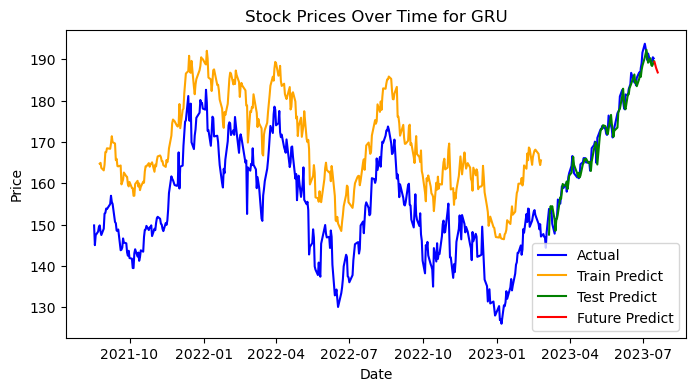

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dates', 'stock_open', 'train_predict', 'test_predict' are defined
dates = np.array(index)
stock_open = np.array(stock_open)
train_predict = np.array(train_predict)
test_predict = np.array(test_predict)

# Create empty arrays for the plot
trainPredictPlot = np.empty_like(stock_open)
trainPredictPlot[:] = np.nan
trainPredictPlot[n_steps:len(train_predict)+n_steps] = train_predict.flatten()

testPredictPlot = np.empty_like(stock_open)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predict)+(n_steps*2):len(train_predict)+(n_steps*2)+len(test_predict)] = test_predict.flatten()

# Flatten future_predict
future_predict = future_predict.flatten()

# Create an array for the future prediction dates
future_dates = np.arange(dates[-1] + np.timedelta64(1, 'D'), dates[-1] + np.timedelta64(window_size + 1, 'D'), np.timedelta64(1, 'D'))

# Create an array for the plot
futurePredictPlot = np.empty_like(np.concatenate((stock_open, np.full(window_size, np.nan))))
futurePredictPlot[:] = np.nan
futurePredictPlot[len(train_predict) + (n_steps * 2) + len(test_predict):] = future_predict

# Plotting
plt.figure(figsize=(8,4))
plt.plot(np.concatenate((dates, future_dates)), np.concatenate((stock_open, np.full(window_size, np.nan))), color='blue', label='Actual')
plt.plot(dates, trainPredictPlot, color='orange', label='Train Predict')
plt.plot(dates, testPredictPlot, color='green', label='Test Predict')
plt.plot(np.concatenate((dates, future_dates)), futurePredictPlot, color='red', label='Future Predict')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time for GRU')
plt.legend()
plt.show()


In [31]:
future_predict

array([189.37289706, 188.59227119, 187.91574998, 187.33030708,
       186.82841643])